# Lab1 数字图像空域增强实验
**Author: Gao Pengbing (nbgao)**  
**Email: nbgao@126.com**

# Work1 彩色图像的直方图均衡化

## Work1-P1
提取RGB三个通道图像，计算其平均直方图结果，然后再进行均衡化

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import colour
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

### RGB Channel

In [60]:
def ChannelShow(img):
    img_r, img_g, img_b = [img[:,:,i] for i in range(3)]

    plt.figure(figsize=(12, 6))

    plt.subplot(221)
    plt.imshow(img)
    plt.title('Origin')
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(img_r, cmap='Reds_r')
    plt.title('Red')
    plt.axis('off')

    plt.subplot(223)
    plt.imshow(img_r, cmap='Greens_r')
    plt.title('Green')
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(img_r, cmap='Blues_r')
    plt.title('Blue')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

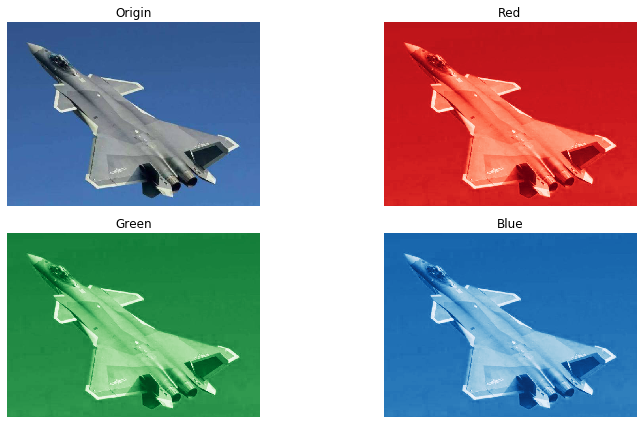

In [61]:
ChannelShow(img)

### Mean Histogram

In [91]:
def MeanHistogram(img):
    h, w = np.shape(img)[:2]
    # 平均灰度图
    img_mean = np.uint8(np.mean(img, axis=2))
    
#     plt.figure(figsize=(4,3))
#     plt.imshow(img_mean, cmap='gray')
#     plt.axis('off')
#     plt.show()
    
    # 平均直方图
#     img_mean = np.uint8(np.mean(img, axis=2))
#     plt.figure(figsize=(8, 4))
#     plt.hist(img_mean.ravel(), 256, [0, 255])
#     plt.grid(ls=':')
#     plt.show()
    
    return img_mean

### Histogram equalization

In [93]:
def HistogramEqualization(img):
    N = 256
    C = np.zeros(N)
    h, w = np.shape(img)[:2]
    for i in range(h):
        for j in range(w):
            C[img[i,j]] += 1
    # 概率密度
    C = C/np.sum(C)
    # 累计概率密度
    P = np.cumsum(C)
    img_histeq = np.zeros_like(img)
    for i in range(h):
        for j in range(w):
            img_histeq[i,j] = 255*P[img[i,j]]
    img_histeq = np.uint8(img_histeq)
    
    # 直方图
#     plt.figure(figsize=(8, 4))
#     plt.hist(img_histeq.ravel(), 256, [0, 255])
#     plt.title('Equalization')
#     plt.grid(ls=':')
#     plt.show()
    
#     plt.figure(figsize=(4,3))
#     plt.imshow(img_histeq, cmap='gray')
#     plt.axis('off')
#     plt.show()
    
    return img_histeq

### Main Program

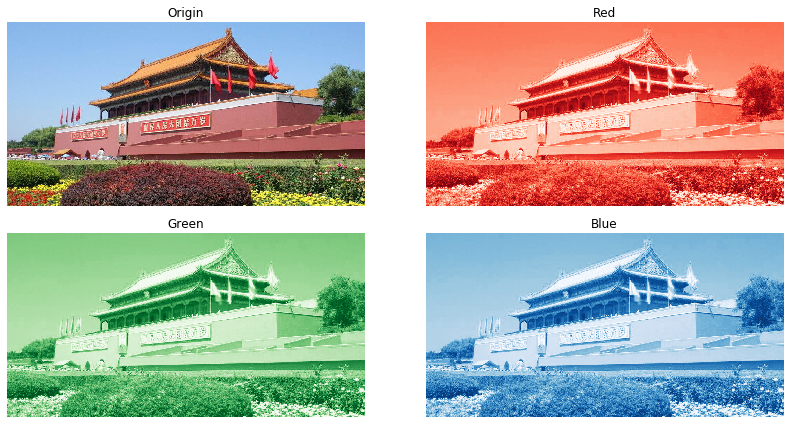

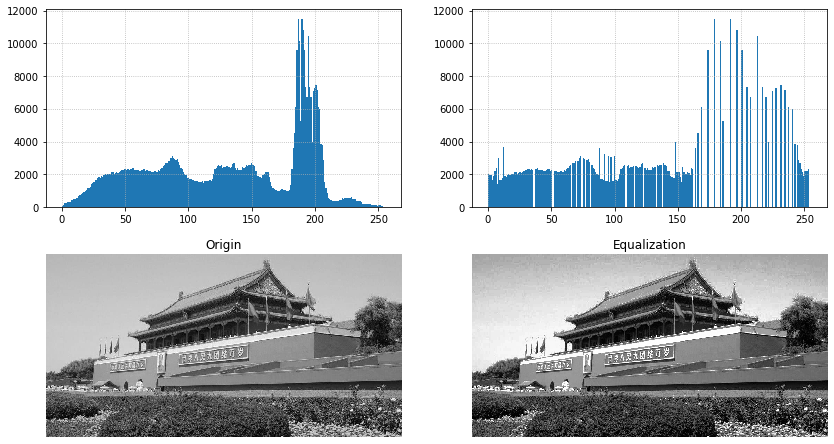

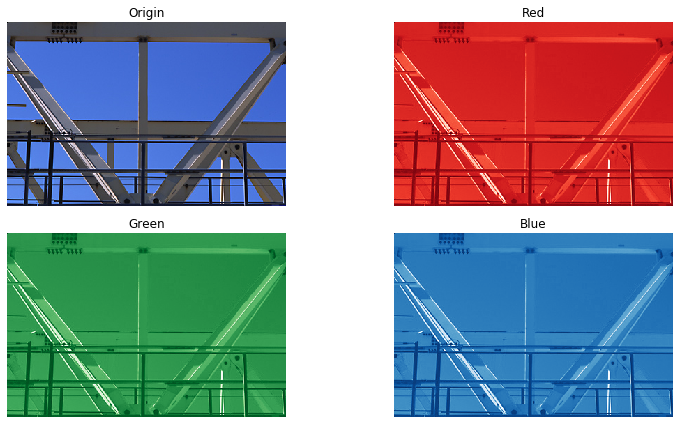

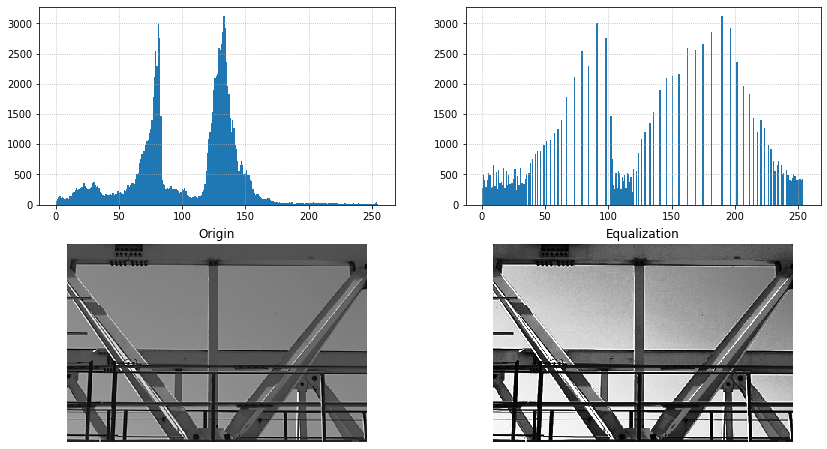

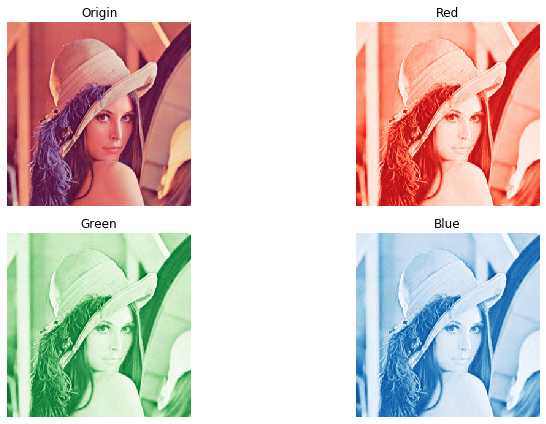

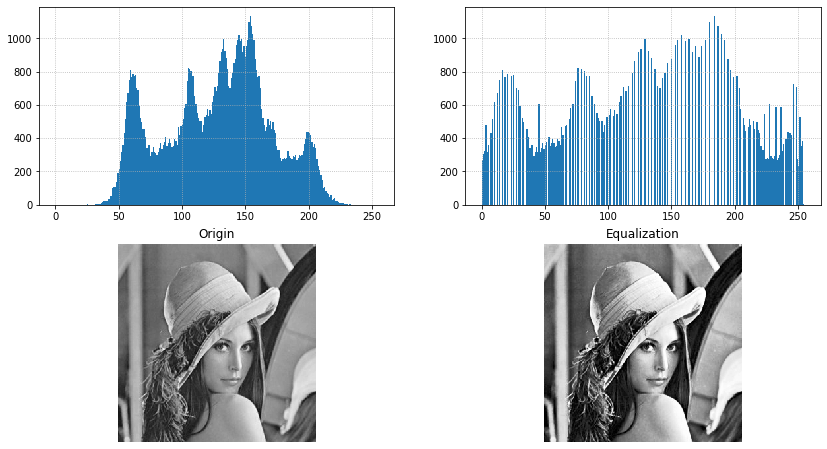

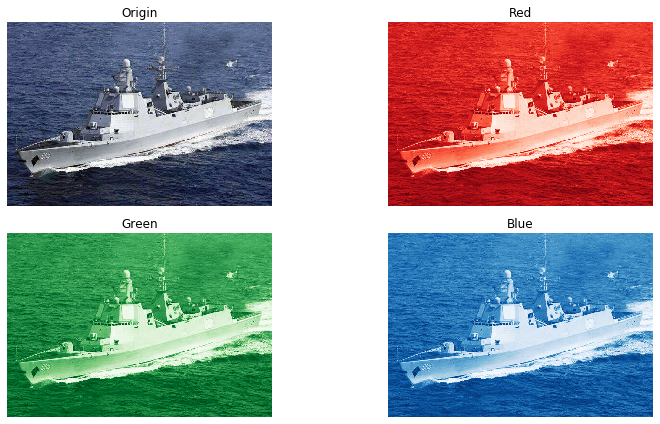

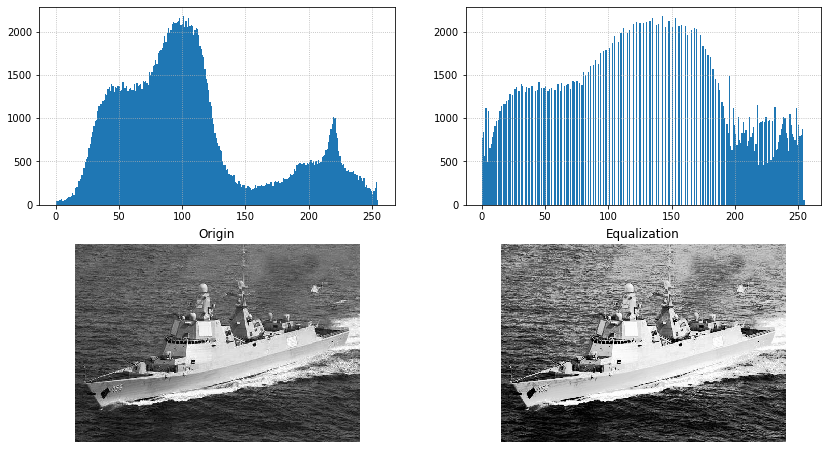

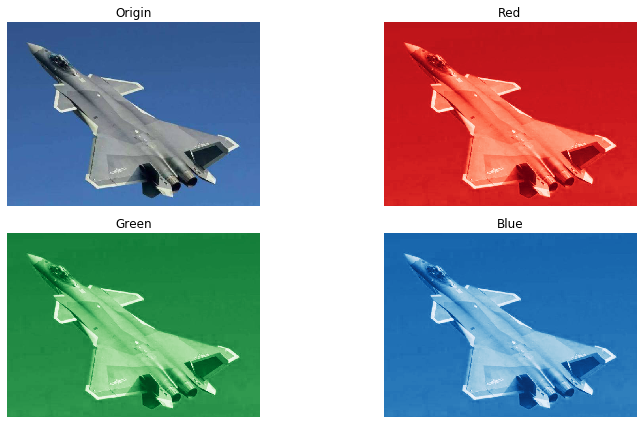

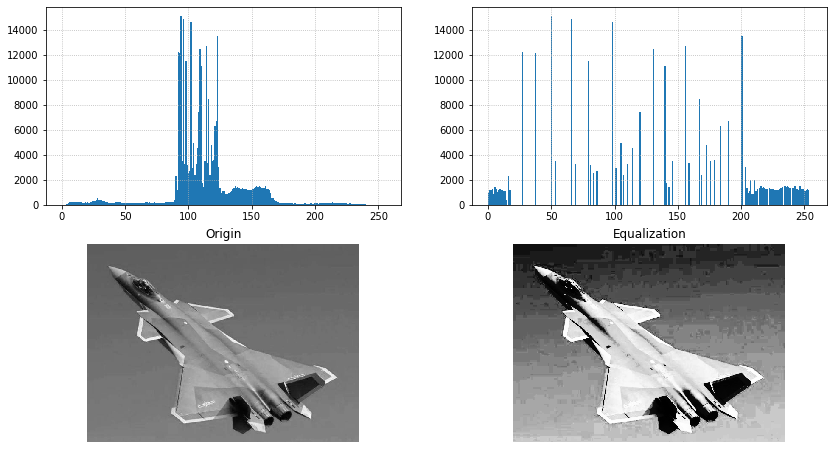

In [98]:
for i in range(1,6):
    file_path = 'Image/image'+str(i)+'.jpg'
    img = plt.imread(file_path)
    ChannelShow(img)
    
    img_mean = MeanHistogram(img)
    img_histeq = HistogramEqualization(img_mean)
    
    plt.figure(figsize=(14,8))

    plt.subplot(221)
    plt.hist(img_mean.ravel(), 256, [0, 255])
    plt.grid(ls=':')
    
    plt.subplot(222)
    plt.hist(img_histeq.ravel(), 256, [0, 255])
    plt.grid(ls=':')    
    
    plt.subplot(223)
    plt.imshow(img_mean, cmap='gray')
    plt.title('Origin')
    plt.axis('off')

    plt.subplot(224)
    plt.imshow(img_histeq, cmap='gray')
    plt.title('Equalization')
    plt.axis('off')
    plt.show()

## Work1-P2
RGB空间转为HSI空间图像，对I（亮度，Intensity）通道进行直方图均衡化，再转为RGB图像

In [26]:
# RGB2HSI (single pixel)
def RGB2HSI(RGB):
    # R,G,B \in [0,1]
    RGB_norm = RGB / 255
    [R, G, B] = RGB_norm
    Max = max(RGB_norm)
    Min = min(RGB_norm)

    # Intensity
    I = (Max + Min) / 2

    # Satuation
    S = 0.0
    if(Max != Min):
        S = (Max-I)/min(I,1-I)

    # Hue
    H = 0.0
    if(Max==Min):
        H = 0
    elif(R == Max):
        H = 0 + (G-B)/(Max-Min)/6
    elif(G == Max):
        H = 1/3 + (B-R)/(Max-Min)/6
    elif(B == Max):
        H = 2/3 + (R-G)/(Max-Min)/6
    if(H<0):
        H += 1

    return [H, S, I]

In [27]:
# rgb2hsi
def rgb2hsi(img):
    h, w = np.shape(img)[:2]
    I_new = np.zeros([h, w, 3])
    for i in range(h):
        for j in range(w):
            I_new[i,j,:] = RGB2HSI(img[i,j,:])
    return I_new

In [28]:
# hsi2rgb
def hsi2rgb(img):
    h, w = np.shape(img)[:2]
    I_new = np.zeros([h, w, 3])
    for i in range(h):
        for j in range(w):
            I_new[i,j,:] = colour.hsl2rgb(img[i,j,:])
    return I_new

In [32]:
# rgb2hsi
img_hsi = rgb2hsi(img)
# Idensity
img_i = np.rint(img_hsi[:,:,2]*255)
img_i = img_i.astype('uint8')
# Idensity Histogram Equalization
img_i_eq = HistogramEqualization (img_i)
# HSI new
img_hsi_eq = img_hsi.copy()
img_hsi_eq[:,:,2] = img_i_eq / 255
# RGB new
img_rgb = hsi2rgb(img_hsi_eq) * 255
img_rgb = img_rgb.astype('uint8')

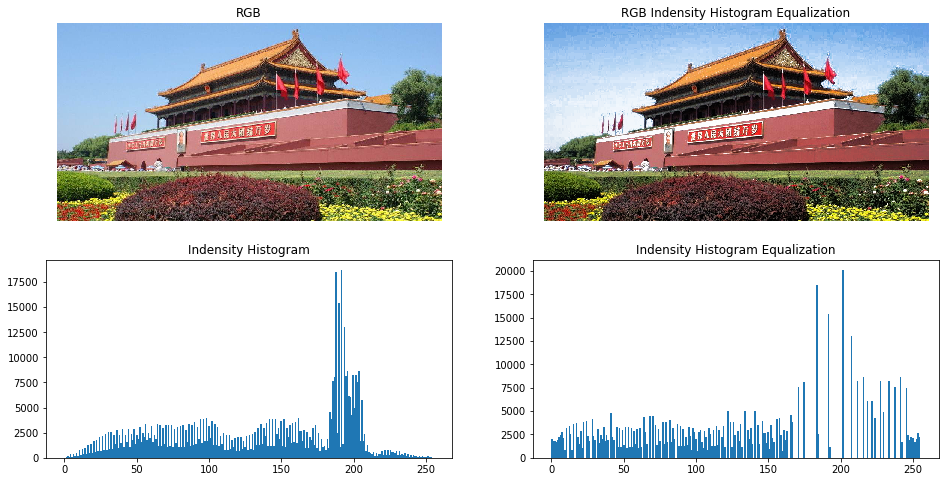

In [33]:
# RGB -> HSI
plt.figure(figsize=(16,8))

plt.subplot(221)
plt.imshow(img)
plt.title('RGB')
plt.axis('off')

plt.subplot(222)
plt.imshow(img_rgb)
plt.title('RGB Indensity Histogram Equalization')
plt.axis('off')

plt.subplot(223)
plt.hist(img_i.ravel(), 256, [0,255])
plt.title('Indensity Histogram')

plt.subplot(224)
plt.hist(img_i_eq.ravel(), 256, [0,255])
plt.title('Indensity Histogram Equalization')

plt.show()

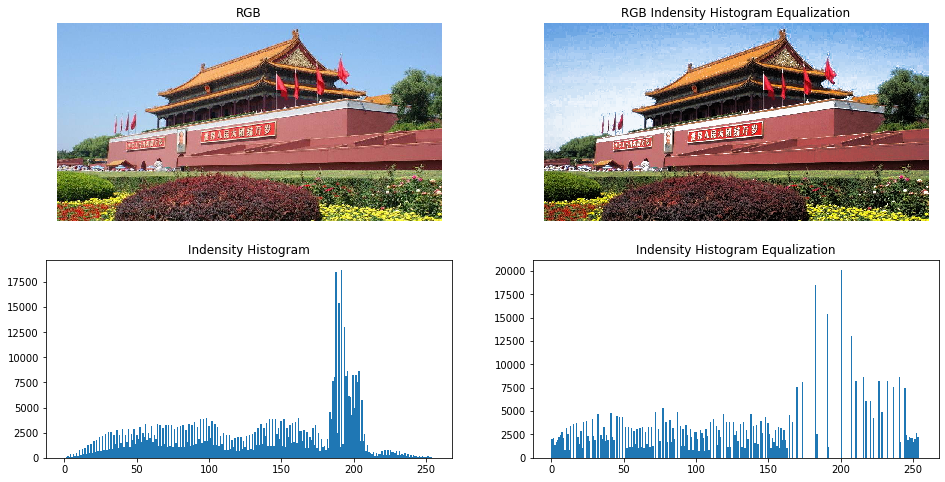

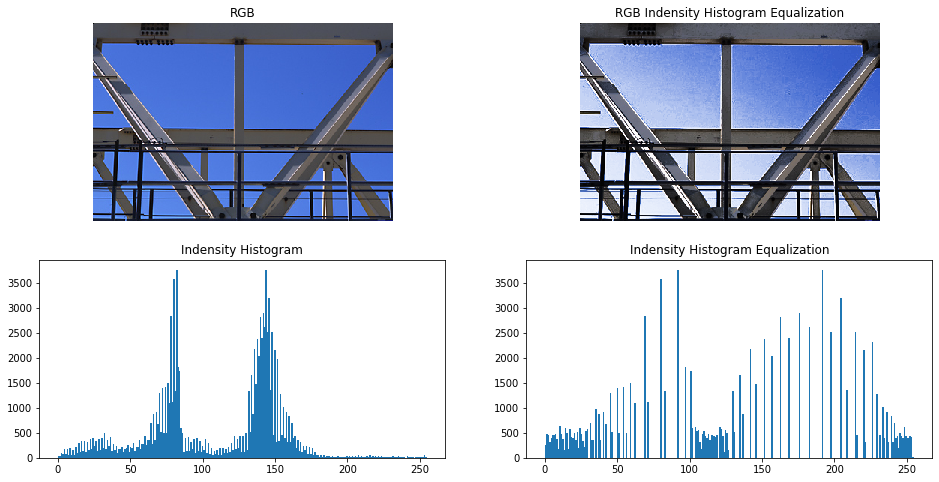

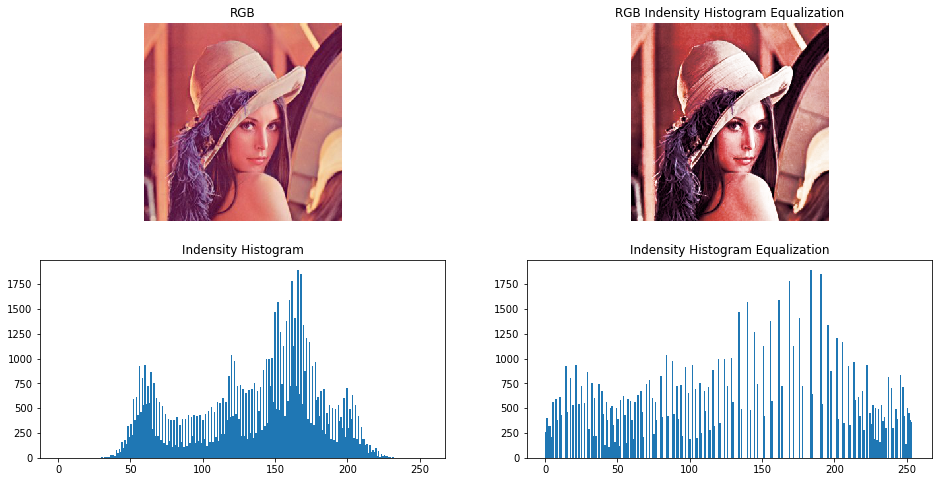

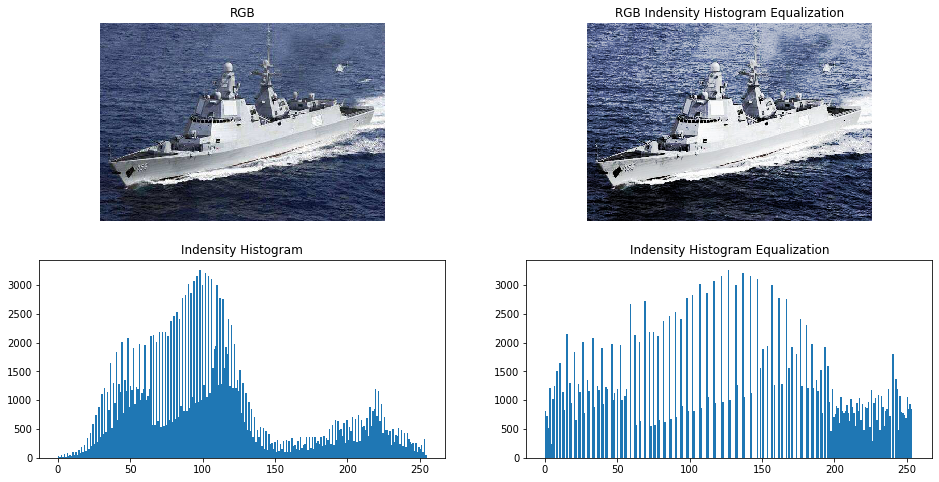

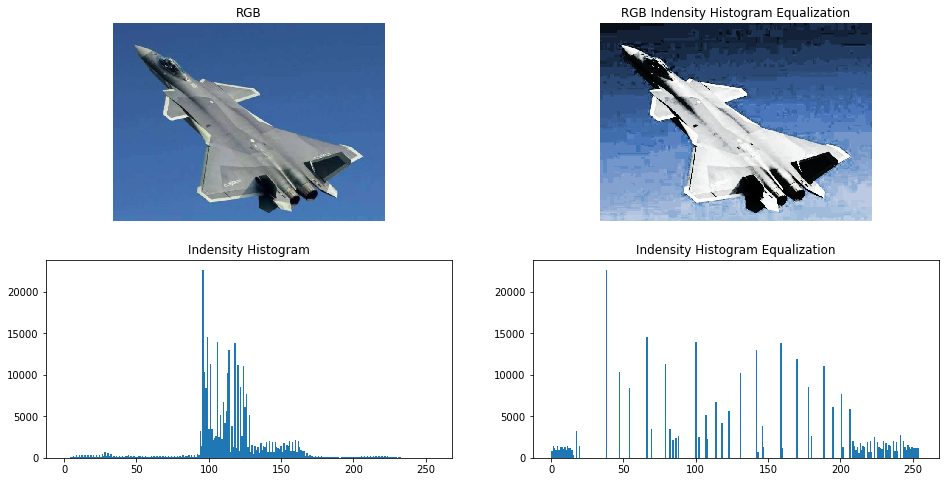

In [99]:
# RGB -> HSI
for i in range(1,6):
    file_path = 'Image/image'+str(i)+'.jpg'
    img = plt.imread(file_path)
    
    # rgb2hsi
    img_hsi = rgb2hsi(img)
    # Idensity
    img_i = np.rint(img_hsi[:,:,2]*255)
    img_i = img_i.astype('uint8')
    # Idensity Histogram Equalization
    img_i_eq = HistogramEqualization (img_i)
    # HSI new
    img_hsi_eq = img_hsi.copy()
    img_hsi_eq[:,:,2] = img_i_eq / 255
    # RGB new
    img_rgb = hsi2rgb(img_hsi_eq) * 255
    img_rgb = img_rgb.astype('uint8')

    plt.figure(figsize=(16,8))

    plt.subplot(221)
    plt.imshow(img)
    plt.title('RGB')
    plt.axis('off')

    plt.subplot(222)
    plt.imshow(img_rgb)
    plt.title('RGB Indensity Histogram Equalization')
    plt.axis('off')

    plt.subplot(223)
    plt.hist(img_i.ravel(), 256, [0,255])
    plt.title('Indensity Histogram')

    plt.subplot(224)
    plt.hist(img_i_eq.ravel(), 256, [0,255])
    plt.title('Indensity Histogram Equalization')

    plt.show()